In [1]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [2]:
def convd2R(rad):
    return rad/180*np.pi

df=pd.read_table('all_rvs.csv',delimiter=',')
df_temp=pd.read_pickle('Temp.pkl')
df_temp['kepid']=[int(i) for i in df_temp['kepid']]
df=pd.merge(df,df_temp,left_on='kepid',right_on='kepid',how='inner')
df=df.loc[df['teff_calc']>3000]
df['X'] = df.r_est * np.cos(convd2R(df.b)) * np.cos(convd2R(df.l)) / 1000.
df['Y'] = -df.r_est * np.sin(convd2R(df.l)) * np.cos(convd2R(df.b))/ 1000.
df['z'] = df.r_est * np.sin(convd2R(df.b))/ 1000.
df['R'] = np.sqrt(np.power(df.X - 8.2,2.) + np.power(df.Y,2.))
df['v_t'],df['v_b']=Astraea.getVs(df)
df

/Users/lucy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0_x,kepid,Mass_berger,KIC,Kp,Q,Teff_santos,E_Teff,e_Teff,...,lndistance_inferred_err,all_vx,all_vy,all_vz,teff_calc,X,Y,R,v_t,v_b
0,0,2,1026474,0.669055,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,18.851932,237.681874,22.697860,4028.989654,0.128668,-0.341176,8.078539,17.702679,15.602643
1,1,3,1162635,0.663326,1162635.0,15.802,1-17,3758.0,45.0,50.0,...,0.043225,-10.099520,231.931139,-7.931889,3878.329799,0.155145,-0.414506,8.055527,20.490185,-11.929150
2,2,4,1164102,0.633985,1164102.0,15.274,1-17,4203.0,126.0,139.0,...,0.010212,-7.579454,224.328848,17.042320,4052.501496,0.117147,-0.315388,8.089003,17.989548,13.596025
3,3,5,1292688,0.519125,1292688.0,15.823,1-17,3776.0,68.0,75.0,...,0.012082,-33.782999,236.878010,-10.950608,3751.604865,0.095695,-0.254989,8.108316,43.054099,-14.155903
4,4,6,1297303,0.669033,1297303.0,15.494,1-17,4451.0,121.0,134.0,...,0.015875,-11.254365,223.844516,19.949773,4318.497349,0.161272,-0.440294,8.050777,22.581097,16.651520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35282,35323,38704,12884589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-12.710633,232.069589,6.702370,5962.721931,0.103367,-0.898058,8.146286,24.194717,3.793384
35283,35324,38705,12934451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.645033,230.128263,16.433961,5776.942050,0.100296,-0.882375,8.147624,12.894025,12.807173
35284,35325,38706,12934465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016119,-54.643035,220.465511,6.772297,4728.426509,0.070263,-0.623255,8.153593,64.961322,8.648168
35285,35326,38707,12934525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.023910,70.483069,224.705712,2.167450,5267.359329,0.099909,-0.882997,8.148076,59.579629,-1.165221


[ 7.43269812e-21 -2.85871860e-16  4.37669326e-12 -3.47574268e-08
  1.52548746e-04 -3.54673368e-01  3.51882114e+02]


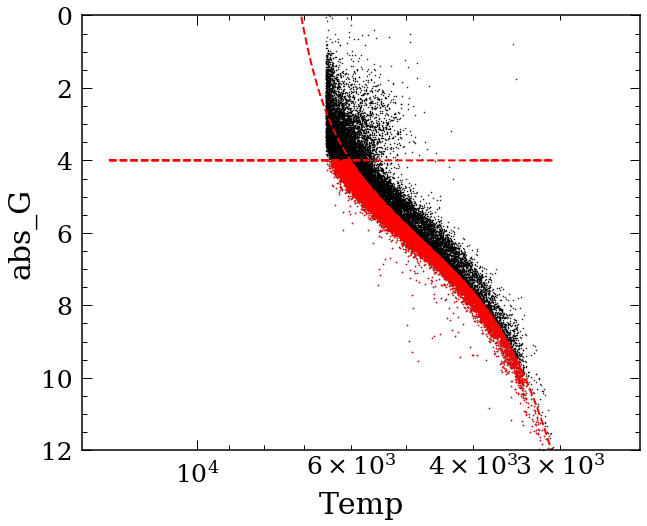

In [4]:
gcut=4
z = np.polyfit(df['teff_calc'], df['abs_G'], 6)
p = np.poly1d(z)

plt.figure(figsize=(10,8))
plt.semilogx(df['teff_calc'],df['abs_G'],'k.',markersize=1)
plt.plot(df['teff_calc'],gcut*np.ones(len(df['teff_calc'])),'r--')
plt.semilogx(sorted(df['teff']),p(sorted(df['teff']))-0.01,'r--',markersize=1)
df_MS=df.loc[df['abs_G']>p(df['teff_calc'])-0.01]
df_MS=df_MS.loc[df_MS['abs_G']>gcut]
df_MS=df_MS.reset_index(drop=True)
plt.semilogx(df_MS['teff_calc'],df_MS['abs_G'],'r.',markersize=1)

plt.ylim([0,12])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Temp')
plt.ylabel('abs_G')
print(z)

In [250]:
vyind=df_MS[np.isnan(df_MS['vy_inferred'])].index
df_MS['vy_inferred'].iloc[vyind]=df_MS['vy'].iloc[vyind]
vyind=df_MS[np.isnan(df_MS['vx_inferred'])].index
df_MS['vx_inferred'].iloc[vyind]=df_MS['vx'].iloc[vyind]
vyind=df_MS[np.isnan(df_MS['vz_inferred'])].index
df_MS['vz_inferred'].iloc[vyind]=df_MS['vz'].iloc[vyind]

/Users/lucy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [263]:
def calcLz(df):
    df['Lz']=df['R']*np.sqrt(np.power(df['vx_inferred'],2.)+np.power(df['vy_inferred'],2.))
    """
    df['Lz']=np.ones(len(df['R']))*(np.median(df['R'].dropna())*
                                    np.sqrt(np.power(np.median(df['vx'].dropna()),2.)+
                                    np.power(np.median(df['vy'].dropna()),2.)))
    """
    
def AVR(df,Fe_H=False):
    sigma_0=21.1 # [km/s]
    sigma_0_err=0.2
    
    beta=0.441 
    beta_err=0.007
    
    lamb=1130 # [kpc km/s]
    lamb_err=40
    
    alpha=0.58 
    alpha_err=0.04
    
    gammaFe=-0.52 # [km/s/dex]
    gammaFe_err=0.01
    
    gammaz=0.2 # [km/s/kpc]
    gammaz_err=0.01 
    
    Lz_sun=232*8.2 
    calcLz(df)
    
    fLz=(alpha*np.power(df['Lz']/Lz_sun,2.)+np.exp(-(df['Lz']-Lz_sun)/lamb))/(1.+alpha)
    df['fLz']=fLz
    if Fe_H==False:
        fFe=1.+gammaFe*-0.1
    else:
        fFe=1.+gammaFe*df['FE_H']
    df['fFe']=fFe
    fz=1.+gammaz*abs(df['z'])
    df['fz']=fz
    
    ftau=df['dv']/sigma_0/fLz/fFe/fz
    
    df['age_new']=np.power(ftau,1./beta)*10.1-0.1
    

def Calcdv_bin(df,f1,f2,binsize_temp,binsize_rot):
    Nstars=len(df)
    
    # initialize velocity dispersion
    df['dv']=np.zeros(Nstars)
    for i in range(Nstars):
        update_progress(i/Nstars)
        teff = df.iloc[i][f1]
        Prot = df.iloc[i][f2]
        
        
        mask_df1=(df[f1]>teff-binsize_temp/2) & (df[f1]<teff+binsize_temp/2)
        mask_df2=(df[f2]>Prot-binsize_rot/2) & (df[f2]<Prot+binsize_rot/2)
        totmask=mask_df1 & mask_df2

        # get the clossest stadrs v_b
        NNstars=df.loc[totmask].dropna(subset=['v_b'])

        df['dv'].iloc[i]=np.std(NNstars['v_b'])

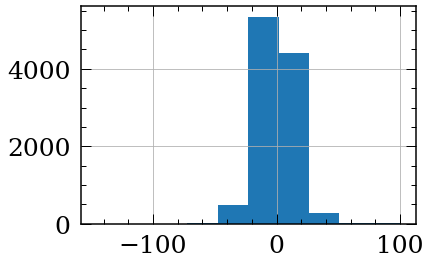

In [299]:
df_MS['vz_inferred'].hist()

In [310]:
df_MS=df_MS.loc[df_MS['vz_inferred']<50]
df_MS=df_MS.loc[df_MS['vz_inferred']>-50]
df_MS=df_MS.reset_index(drop=True)

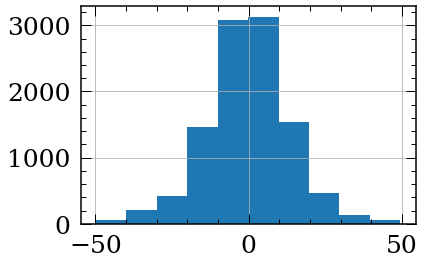

In [311]:
df_MS['vz_inferred'].hist()

In [349]:
df_MS['Prot_log']=np.log10(df_MS['Prot'])
Calcdv_bin(df_MS,'teff_calc','Prot_log',577.27,0.11)

Progress: [####################] 100.0%


In [352]:
mpf = 'aviary/data/metal_poor_avr.csv'
mrf = 'aviary/data/metal_rich_avr.csv'
af = 'aviary/data/all_stars_avr.csv'
def get_avr_coefficients():
    """
    Fit the parameters of the AVR using data from Yu & Liu:
    https://arxiv.org/pdf/1712.03965.pdf
    Fit to the relationship between log(sigma_z) and age.
    Returns:
        p_mp (array): coefficients [slope, intercept] for straight line fit to
            metal poor stars.
        p_mr (array): coefficients [slope, intercept] for straight line fit to
            metal rich stars.
        p_a (array): coefficients [slope, intercept] for straight line fit to
            all stars.
    """
    mp = pd.read_csv(mpf)
    mr = pd.read_csv(mrf)
    a = pd.read_csv(af)

    p_mp = np.polyfit(np.log(mp.sigma_z_kms), np.log(mp.Age_Gyr), 1)
    p_mr = np.polyfit(np.log(mr.sigma_z_kms), np.log(mr.Age_Gyr), 1)
    p_a = np.polyfit(np.log(a.sigma_z_kms), np.log(a.Age_Gyr), 1)

    return p_mp, p_mr, p_a

def v_to_age(v, coeffs):
    """
    Convert z velocity dispersion [km/s] to age [Gyr]
    Args:
        v (array): Z Velocity dispersion [km/s].
        coeffs (array): coefficients for straight line fit. [intercept, slope]
    Returns:
        age (array): age in Gyr.
    """
    b, a = coeffs
    logt = np.polyval(coeffs, np.log(v))
    return np.exp(logt)

In [359]:
AVR(df_MS)
p_mp, p_mr, p_a = get_avr_coefficients()
df_MS['age_old']= v_to_age(df_MS['dv'], p_mr)

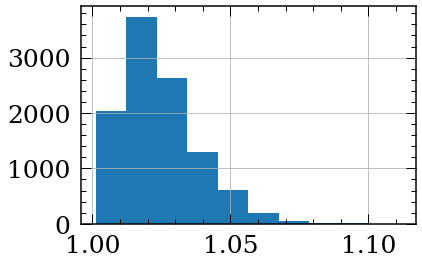

In [270]:
df_MS=df_MS.loc[df_MS['Lz']>1000]
df_MS=df_MS.loc[df_MS['Lz']<3500]
df_MS['fz'].hist()

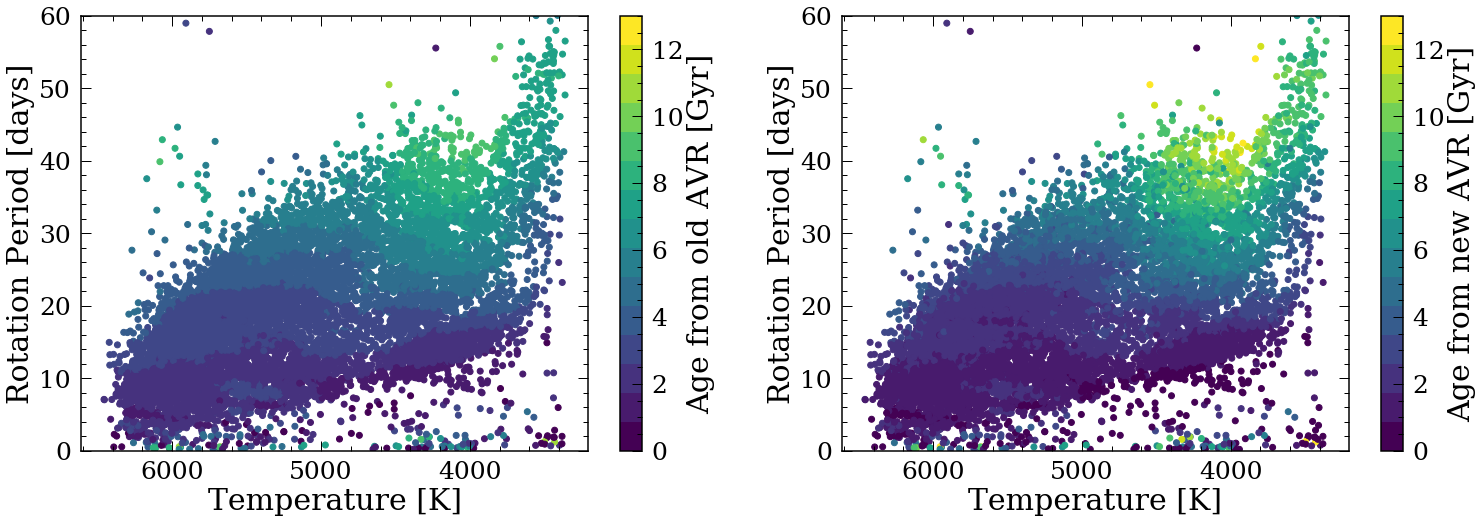

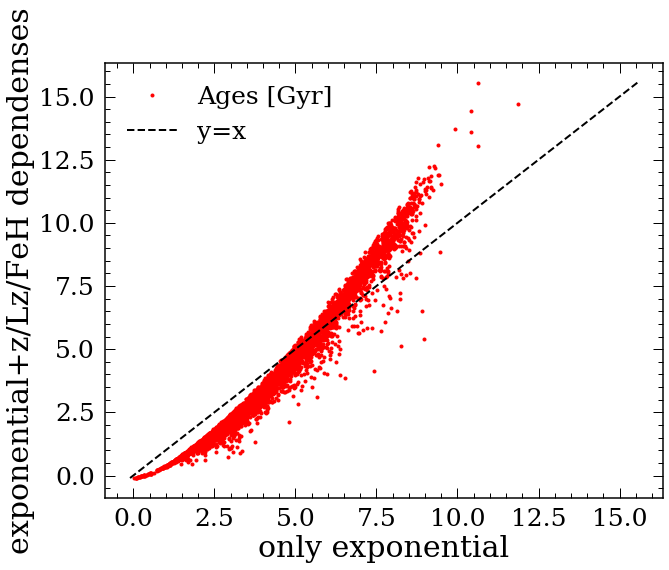

In [367]:
plt.figure(figsize=(25,8))
cm = plt.cm.get_cmap('viridis',15)
plt.subplot(1,2,1)
plt.scatter(df_MS['teff_calc'],df_MS['Prot'],c=df_MS['age_old'],cmap=cm,vmin=0,vmax=13)
plt.ylim([0,60])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Temperature [K]')
cb=plt.colorbar()
cb.set_label('Age from old AVR [Gyr]')

plt.subplot(1,2,2)
plt.scatter(df_MS['teff_calc'],df_MS['Prot'],c=df_MS['age_new'],cmap=cm,vmin=0,vmax=13)
plt.ylim([0,60])
plt.gca().invert_xaxis()
plt.ylabel('Rotation Period [days]')
plt.xlabel('Temperature [K]')
cb=plt.colorbar()
cb.set_label('Age from new AVR [Gyr]')

plt.figure(figsize=(10,8))
plt.plot(df_MS['age_old'],df_MS['age_new'],'r.',label='Ages [Gyr]')
minage=min(min(df_MS['age_old']),min(df_MS['age_new']))
maxage=max(max(df_MS['age_old']),max(df_MS['age_new']))
plt.plot([minage,maxage],[minage,maxage],'k--',label='y=x')
plt.xlabel('only exponential')
plt.ylabel('exponential+z/Lz/FeH dependenses')
plt.legend()

# Apogee

In [333]:
APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')
df_MS_AP=pd.merge(APOGEE,df_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_st=df_MS_AP.loc[abs(df_MS_AP['FE_H'])<=0.1]
df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]
print(len(df_st))

abun_apog=['C_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','TI_FE','CR_FE','MN_FE','CO_FE',
       'NI_FE','CU_FE']

abund={'C_FE':'[CI/H]','MG_FE':'[MgI/H]','AL_FE':'[AlI/H]','SI_FE':'[SiI/H]','S_FE':'[ScI/H]',
       'CA_FE':'[CaI/H]','TI_FE':'[TiI/H]','CR_FE':'[CrI/H]','MN_FE':'[MnI/H]','CO_FE':'[CoI/H]',
       'NI_FE':'[NiI/H]','CU_FE':'[CuI/H]'}


df_ka=pd.read_table('BedellAbund.csv',delimiter=',')
df_ka.HIP=[int(i) for i in df_ka.HIP.values]
df_ka_age=pd.read_table('Bedell_age.csv',delimiter=',')
df_ka_age.HIP=[int(i) for i in df_ka_age.HIP.values]

df_st_md=pd.merge(df_ka,df_ka_age,left_on='HIP',right_on='HIP',how='inner')
df_st_md.columns

2


Index(['HIP', '[CI/H]', '[CH/H]', '[OI/H]', '[NaI/H]', '[MgI/H]', '[AlI/H]',
       '[SiI/H]', '[SI/H]', '[CaI/H]', '[ScI/H]', '[ScII/H]', '[TiI/H]',
       '[TiII/H]', '[VI/H]', '[CrI/H]', '[CrII/H]', '[MnI/H]', '[CoI/H]',
       '[NiI/H]', '[CuI/H]', '[ZnI/H]', '_RA', '_DE', 'recno', 'e_[ZnI/H]',
       'e_[VI/H]', 'e_[TiII/H]', 'e_[SiI/H]', 'e_[TiI/H]', 'e_[SI/H]',
       'e_[ScII/H]', 'e_[ScI/H]', 'e_[OI/H]', 'e_[NiI/H]', 'e_[NaI/H]',
       'e_[MnI/H]', 'e_[MgI/H]', 'e_[CuI/H]', 'e_[AlI/H]', 'e_[CaI/H]',
       'e_[CH/H]', 'e_[CI/H]', 'e_[CoI/H]', 'e_[CrI/H]', 'e_[CrII/H]',
       'RAJ2000', 'DEJ2000', 'Agemp', 'AgeLL1s', 'AgeUL1s', 'AgeLL2s',
       'AgeUL2s', 'Agemean', 'Agestd', 'Massmp', 'MassLL1s', 'MassUL1s',
       'MassLL2s', 'MassUL2s', 'MassMean', 'MassStd'],
      dtype='object')

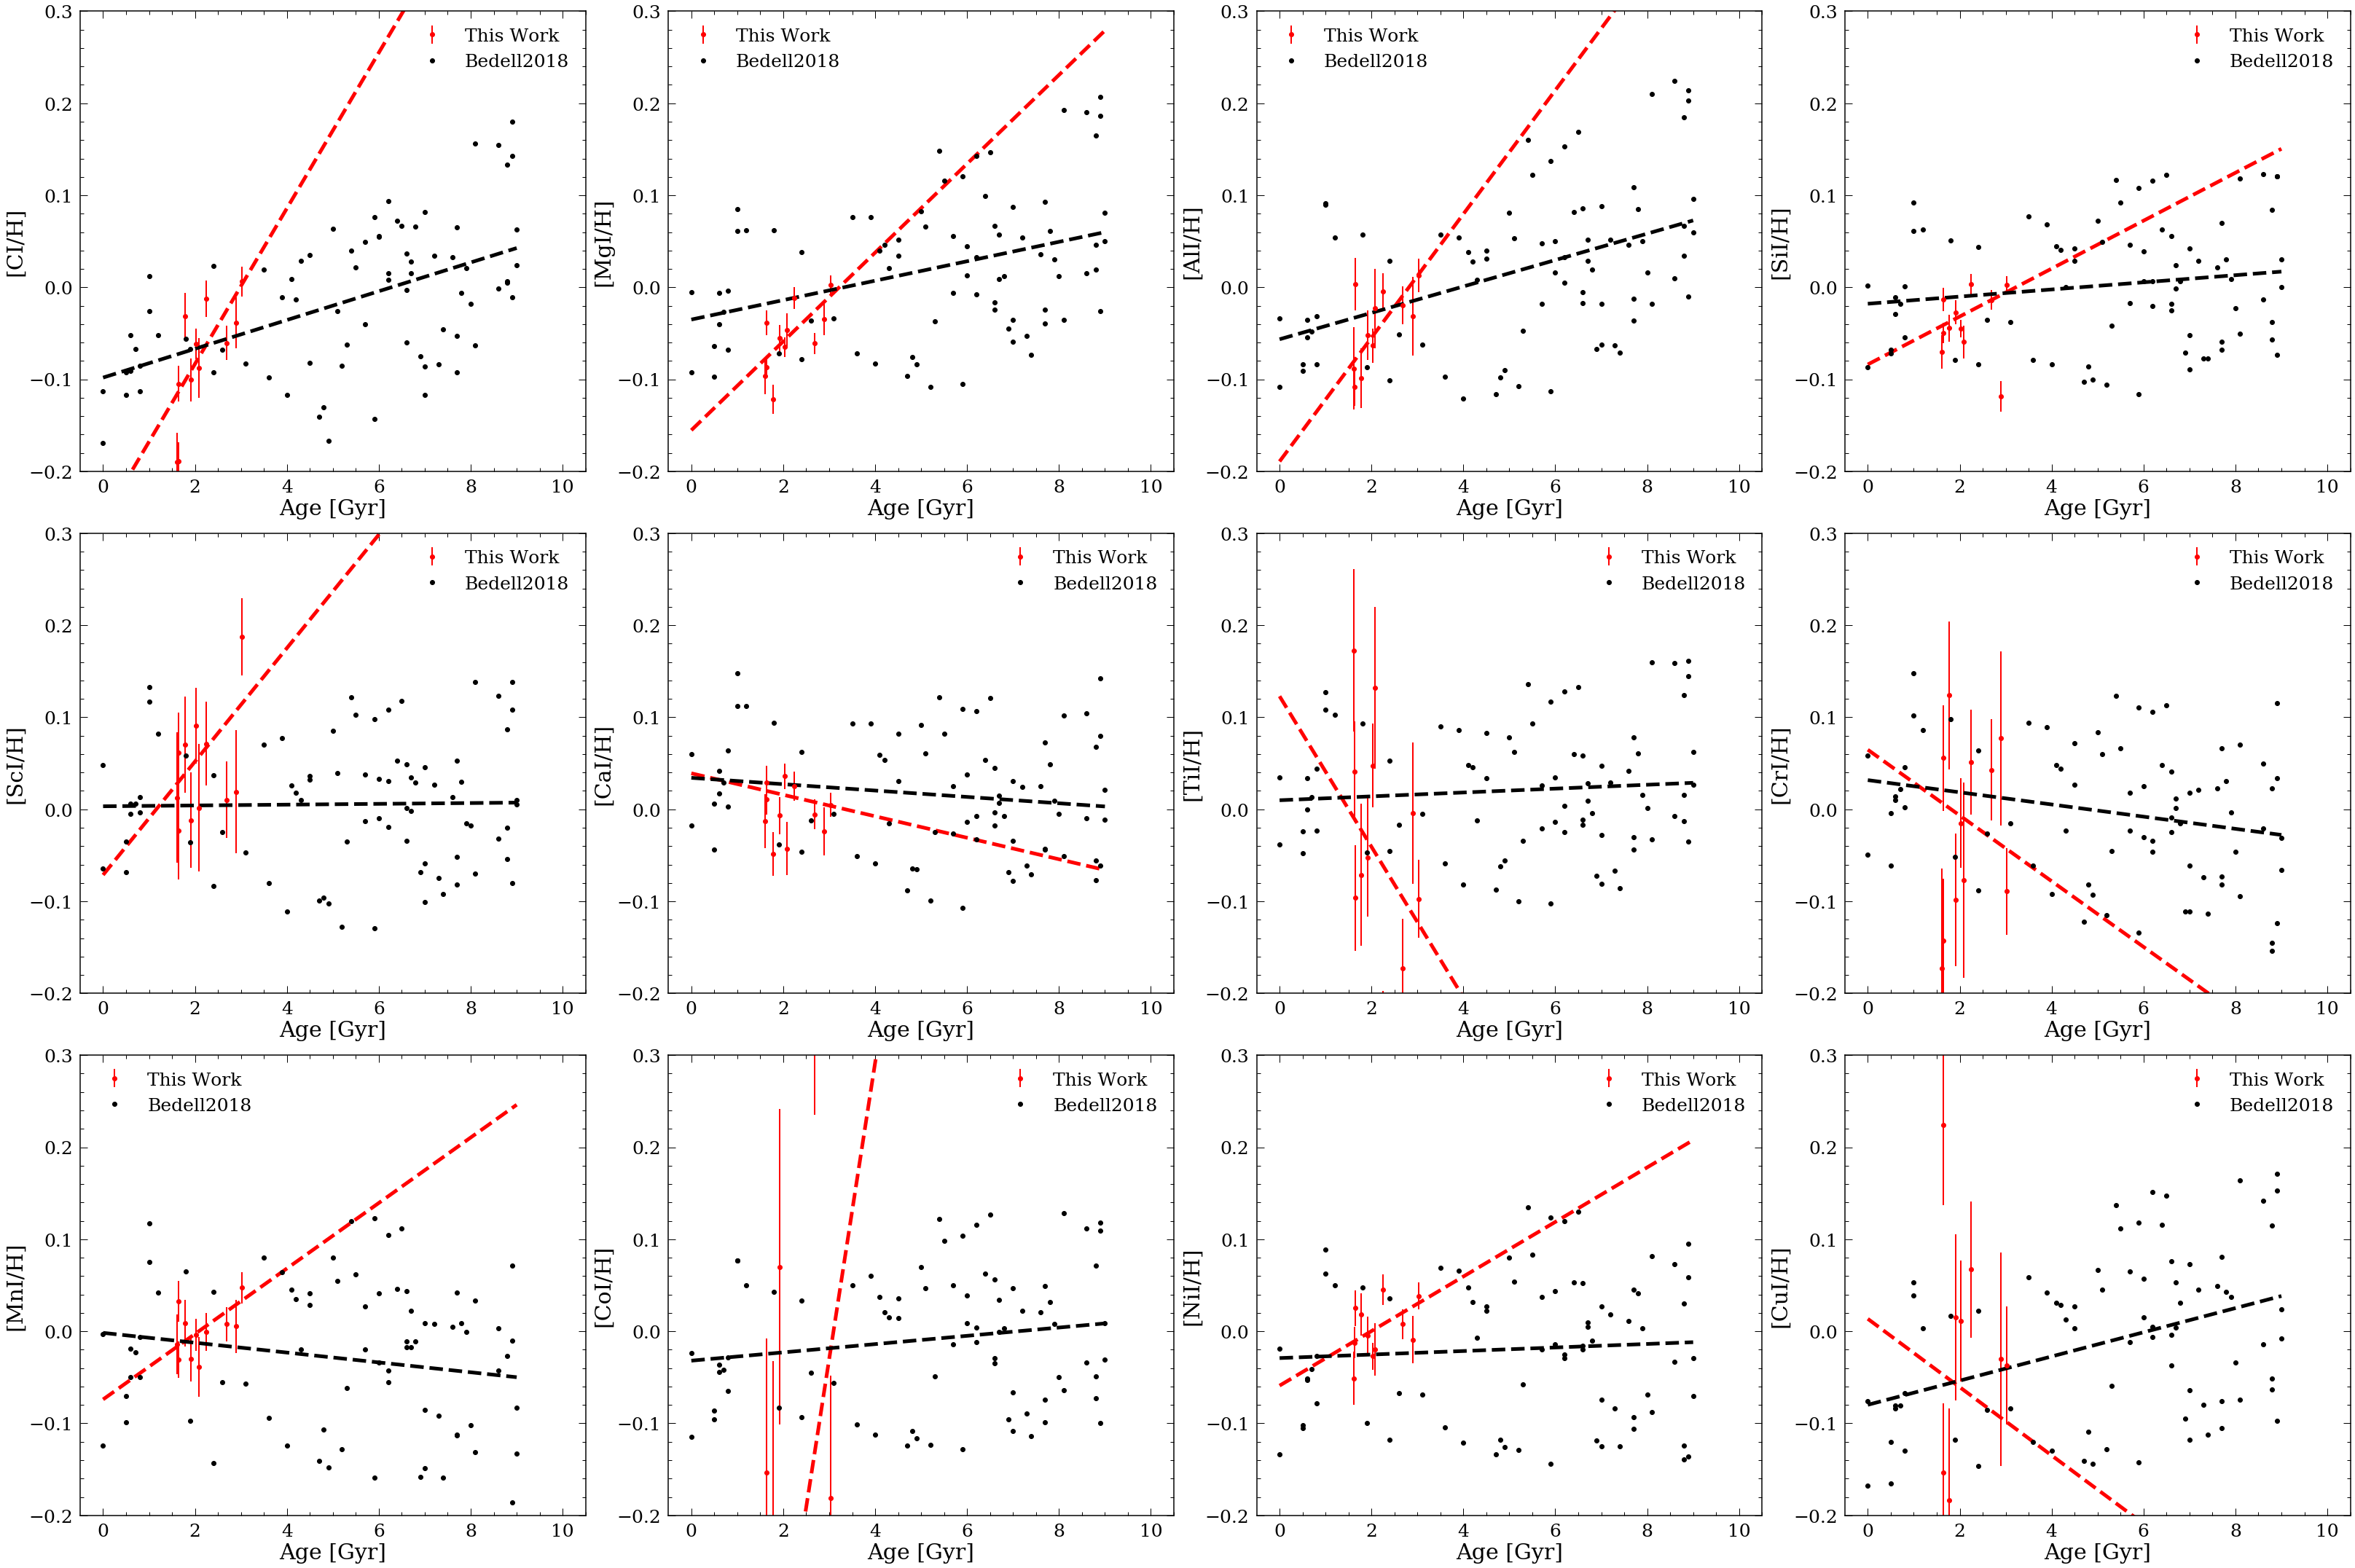

In [332]:
plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    df_plot=df_st.loc[df_st[abun_apog[i]]>-100]
    plt.subplot(3,4,i+1)
    
    #err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)+np.power(df_plot["age_STD_err"],2.)
    err=np.power(df_plot[abun_apog[i]+"_ERR"],2.)
    
    z = np.polyfit(df_plot['age_new'], df_plot[abun_apog[i]],1,w=1./err)
    p = np.poly1d(z)
        
    plt.errorbar(df_plot['age_new'],df_plot[abun_apog[i]],yerr=df_plot[abun_apog[i]+"_ERR"],
                 fmt='ro',label='This Work')
    plt.plot(range(10),p(range(10)),'r--',linewidth=5)
    
    z = np.polyfit(df_st_md['Agemp'], df_st_md[abund[abun_apog[i]]],1,)
    p = np.poly1d(z)
    
    plt.errorbar(df_st_md['Agemp'],df_st_md[abund[abun_apog[i]]],fmt='ko',label='Bedell2018')
    plt.plot(range(10),p(range(10)),'k--',linewidth=5)
    
    
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.ylabel(abund[abun_apog[i]])
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()
#plt.savefig('Abundances.png')
    
    

In [335]:
cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

['C_FE',
 'CI_FE',
 'N_FE',
 'O_FE',
 'NA_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE',
 'CU_FE',
 'GE_FE',
 'RB_FE',
 'CE_FE',
 'ND_FE',
 'YB_FE']

0


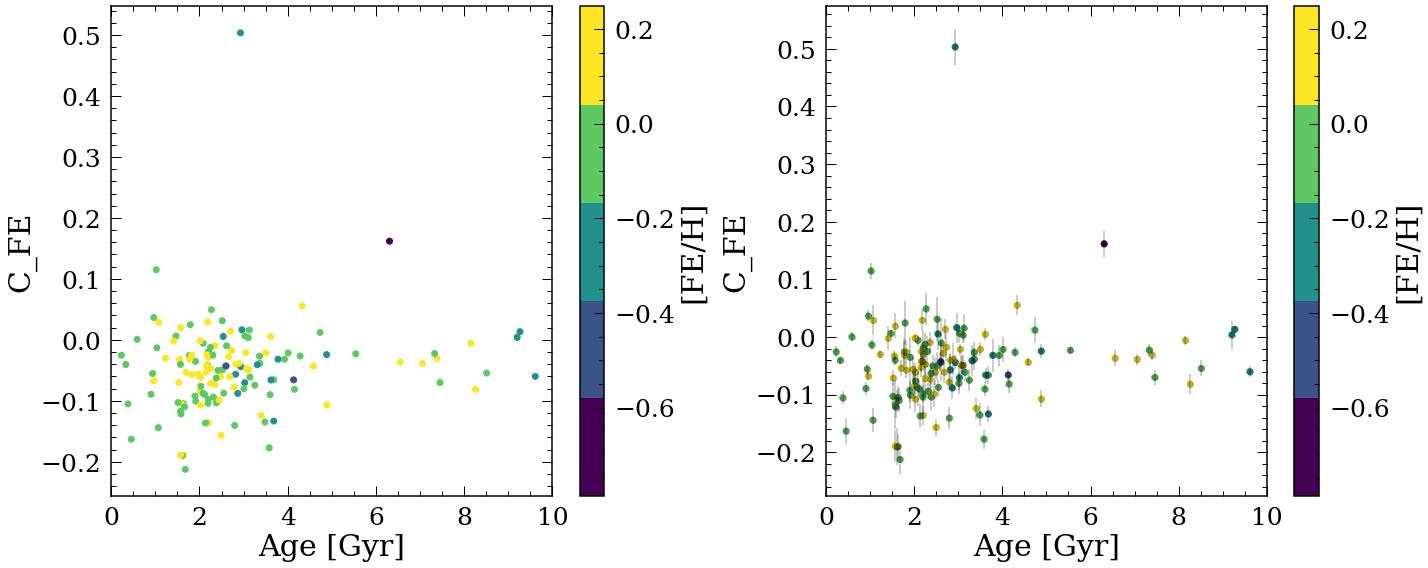

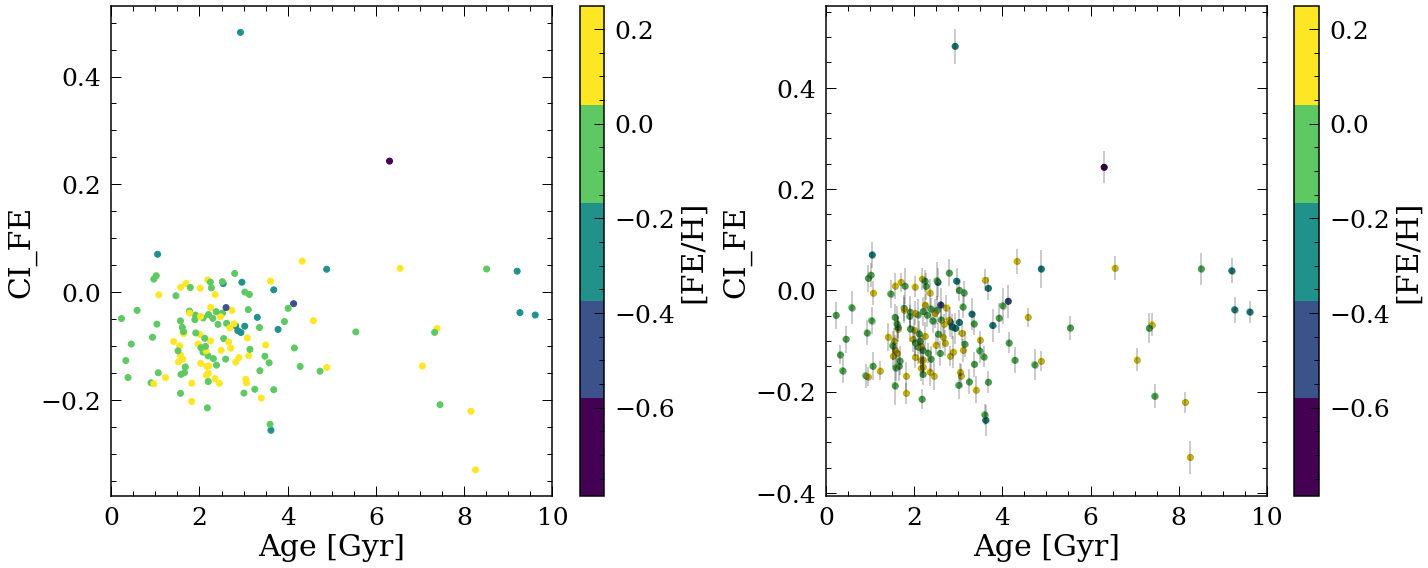

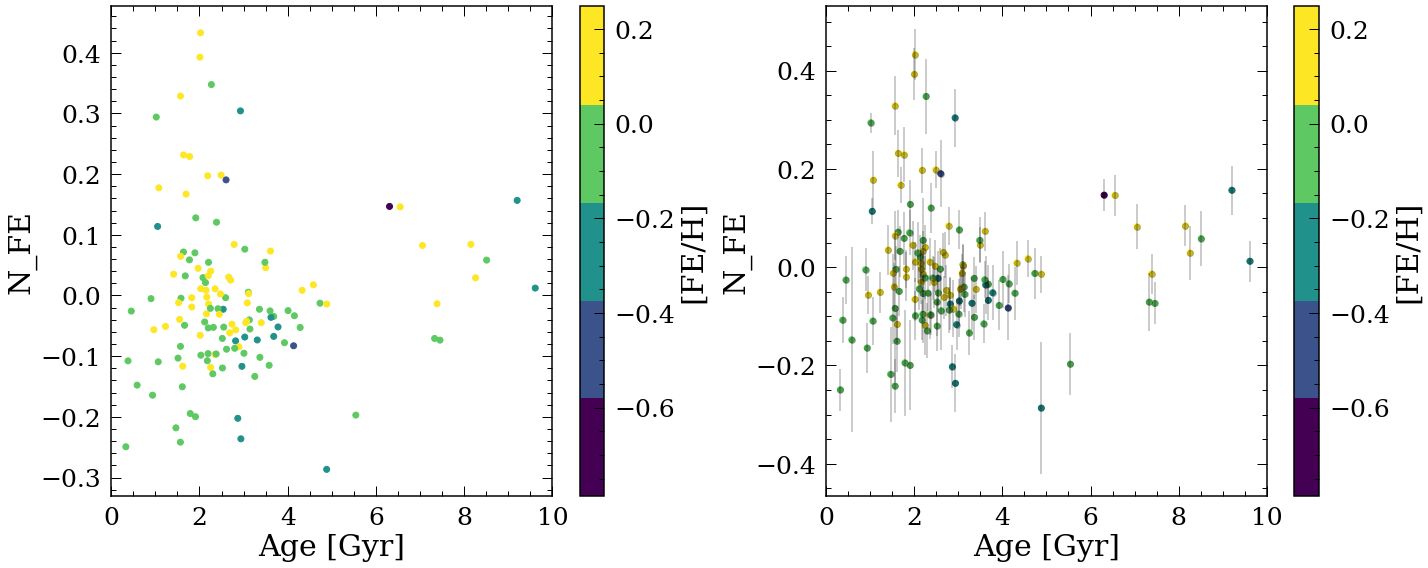

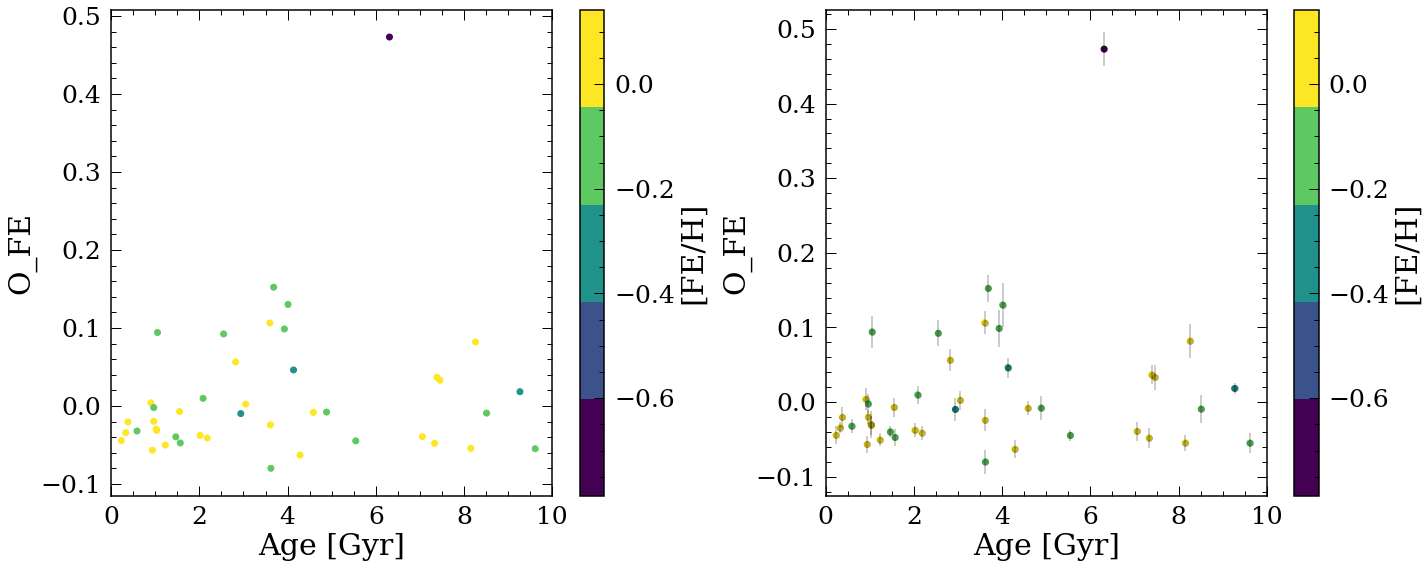

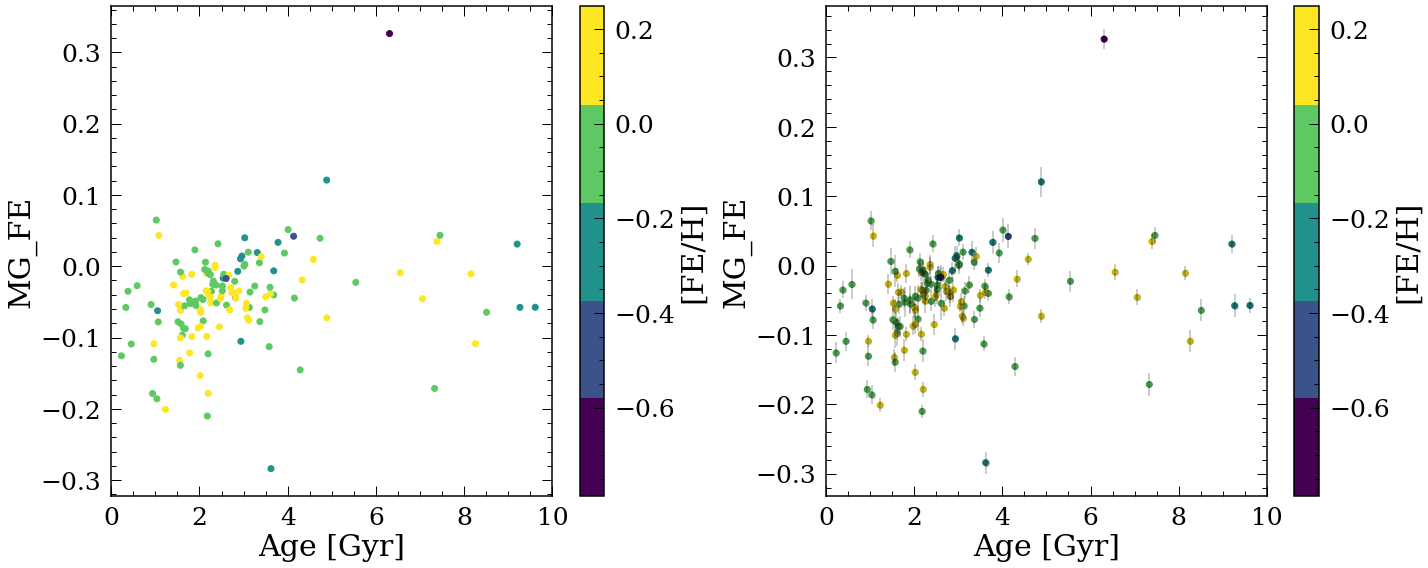

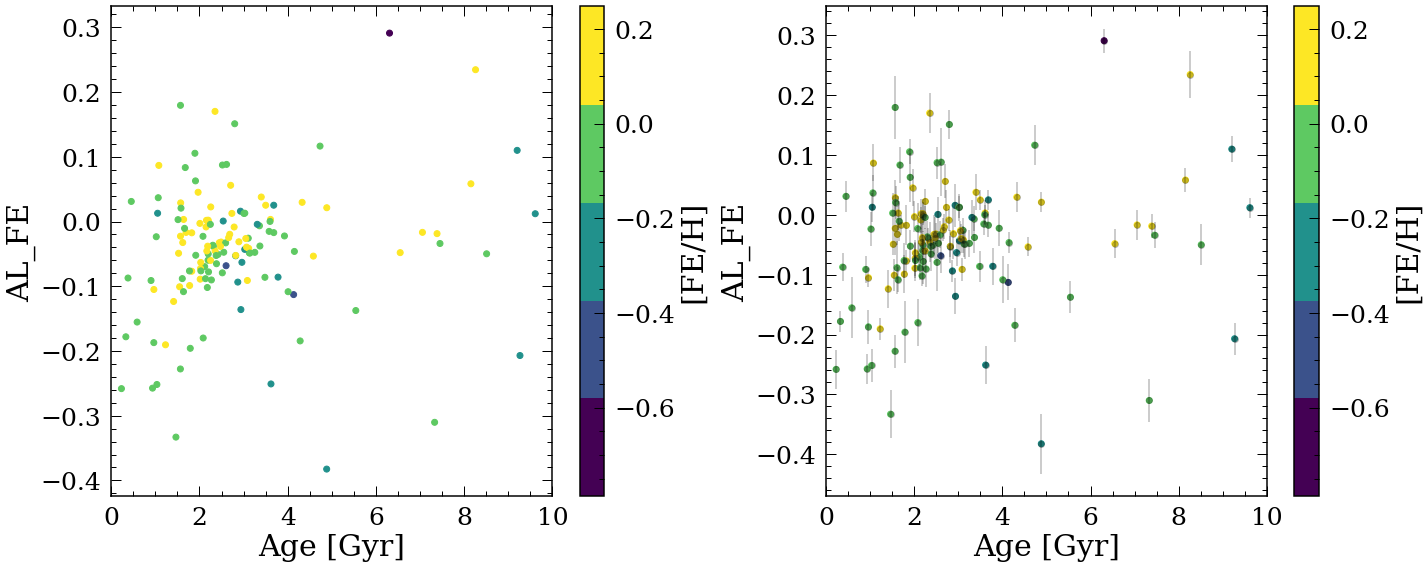

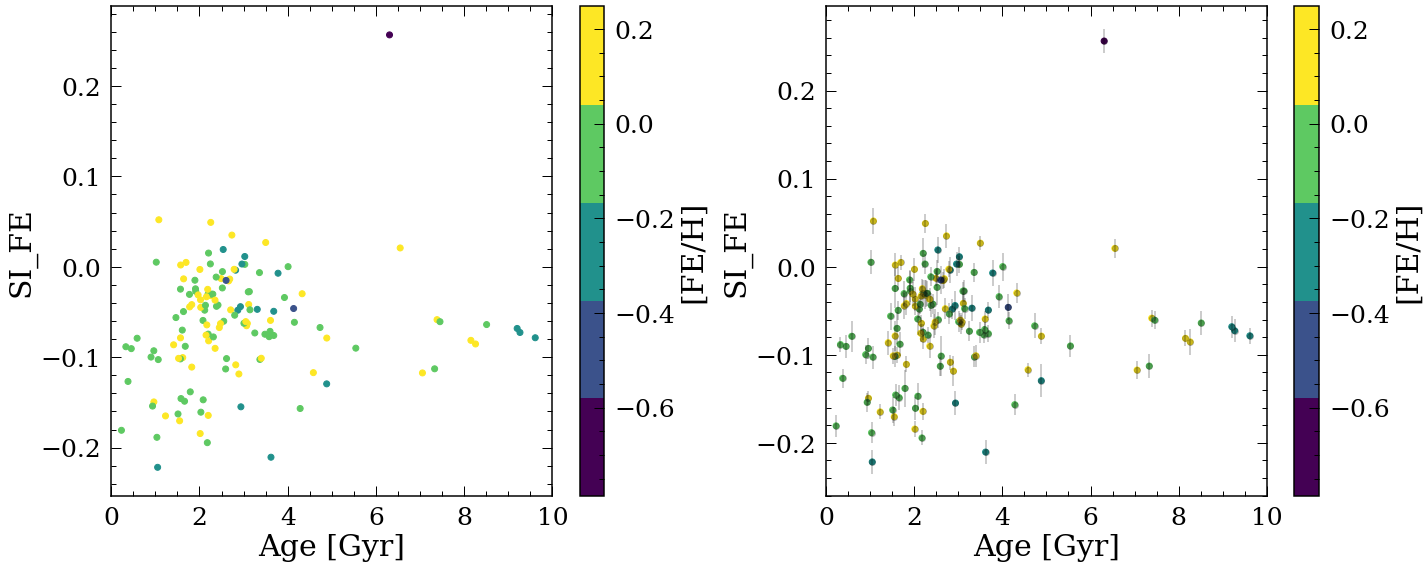

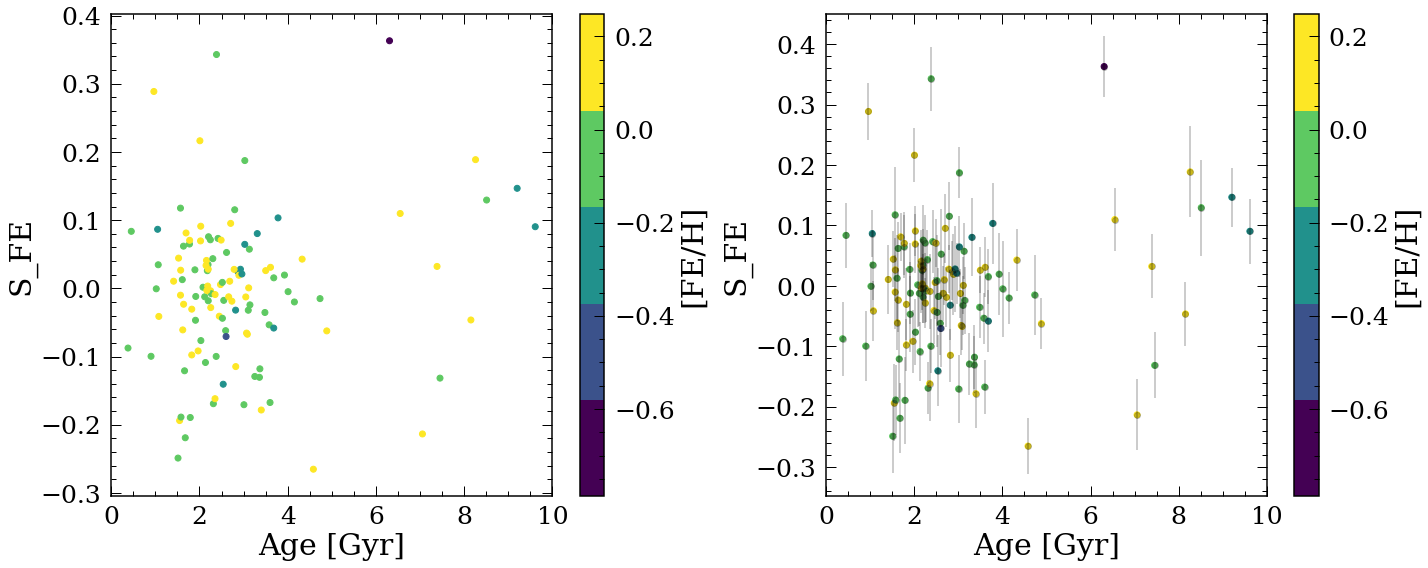

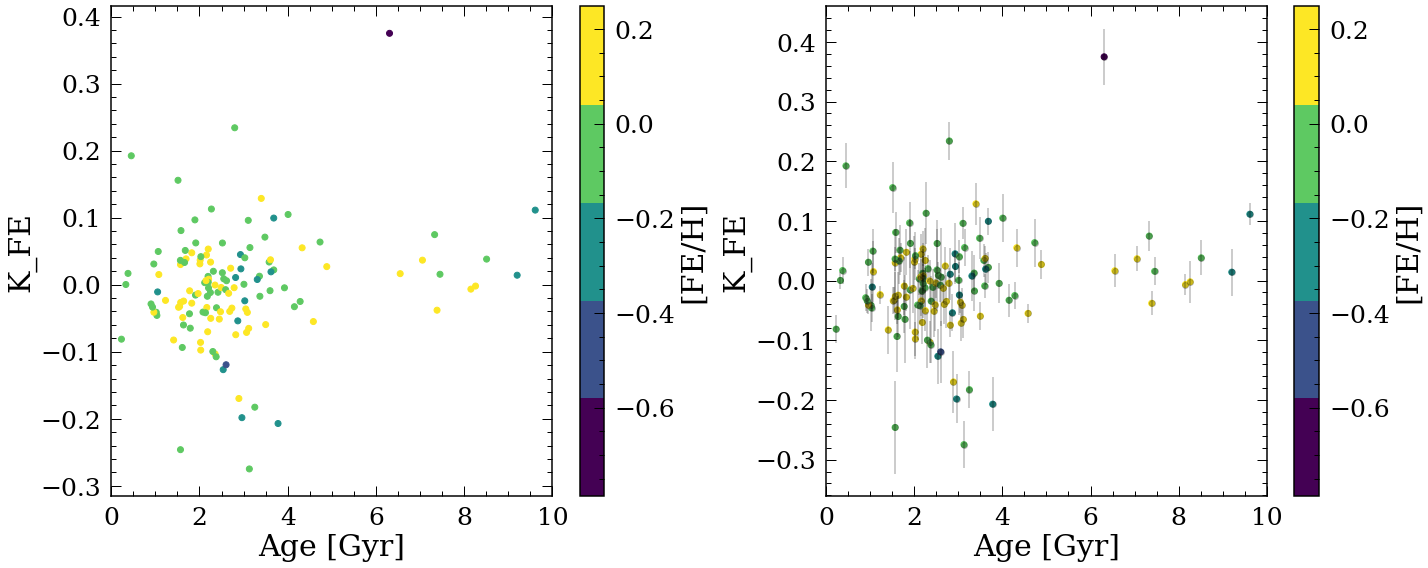

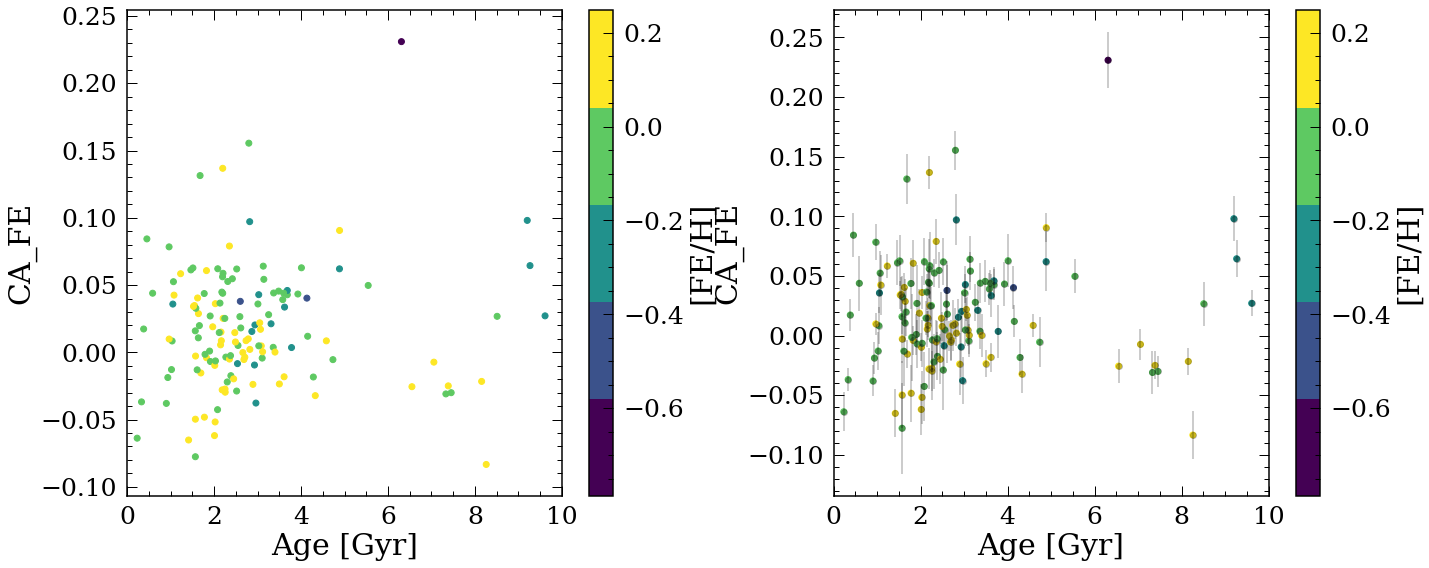

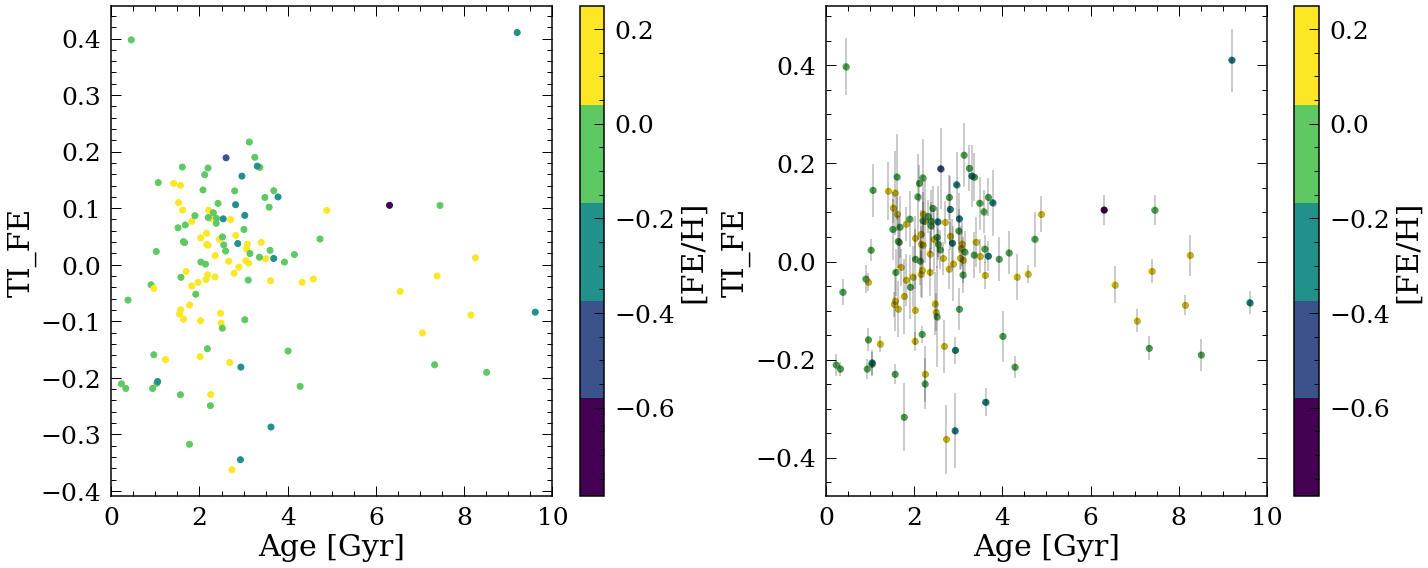

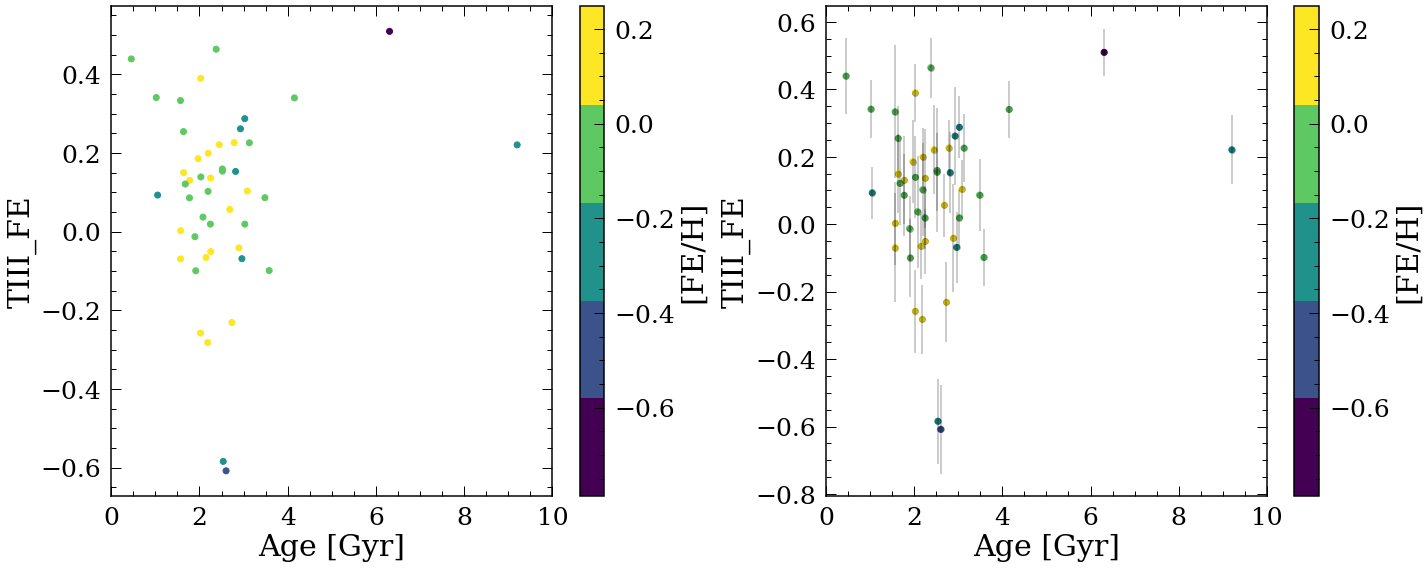

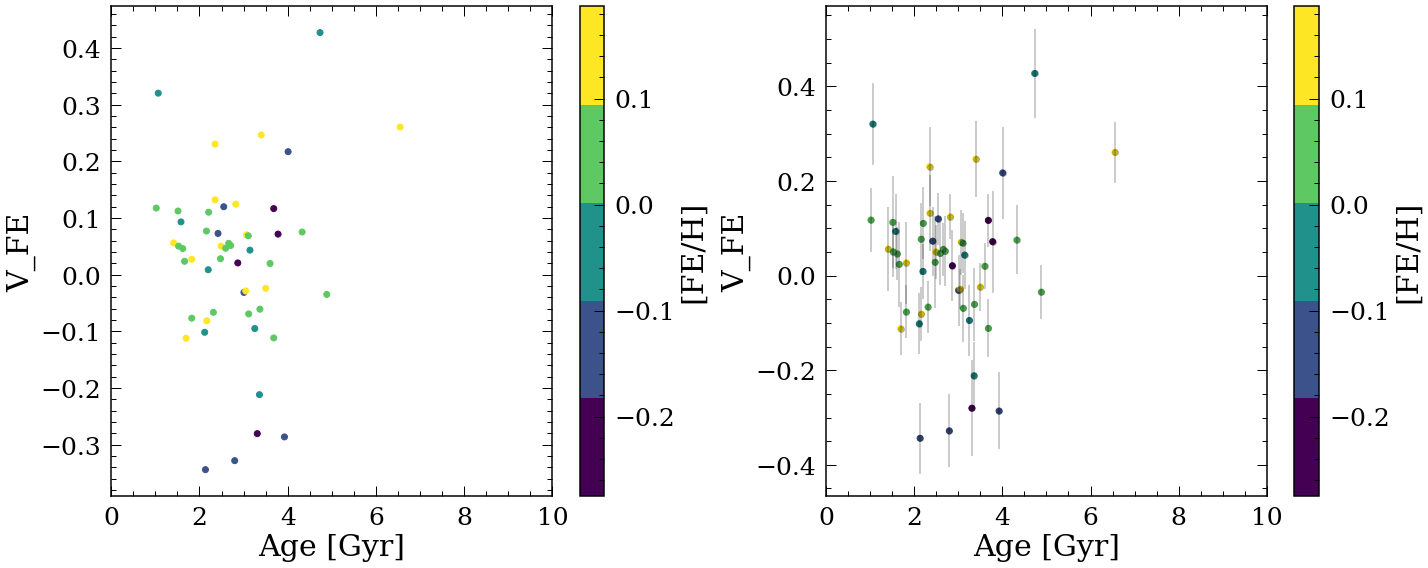

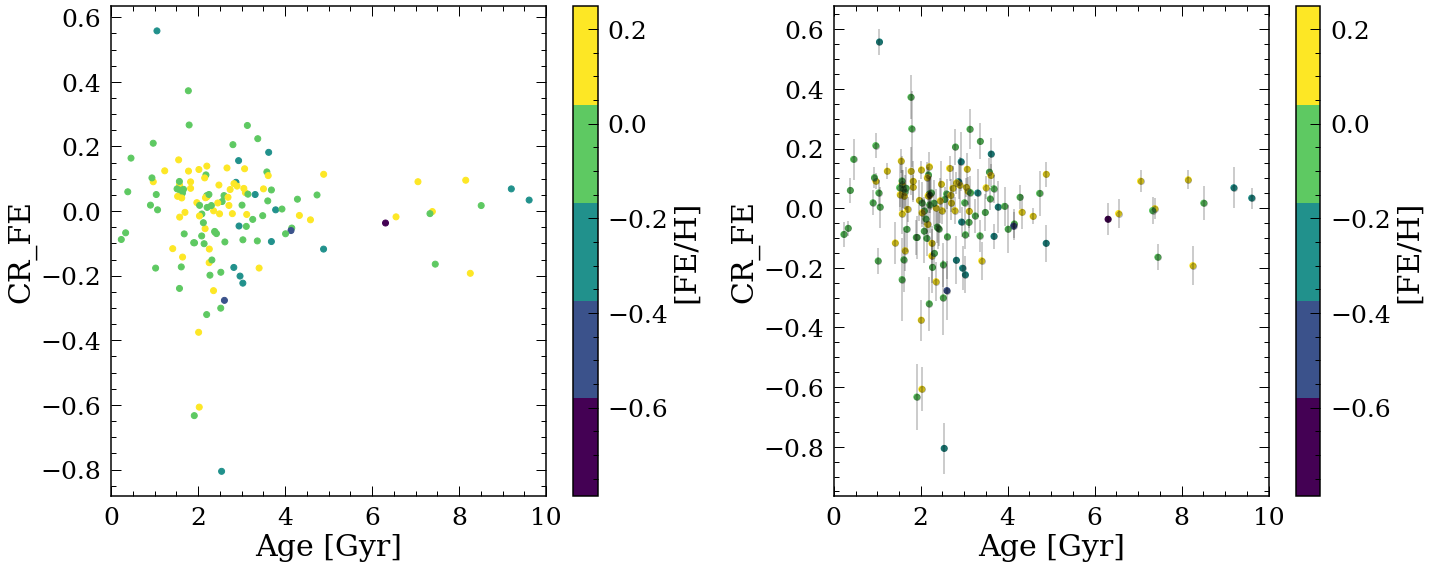

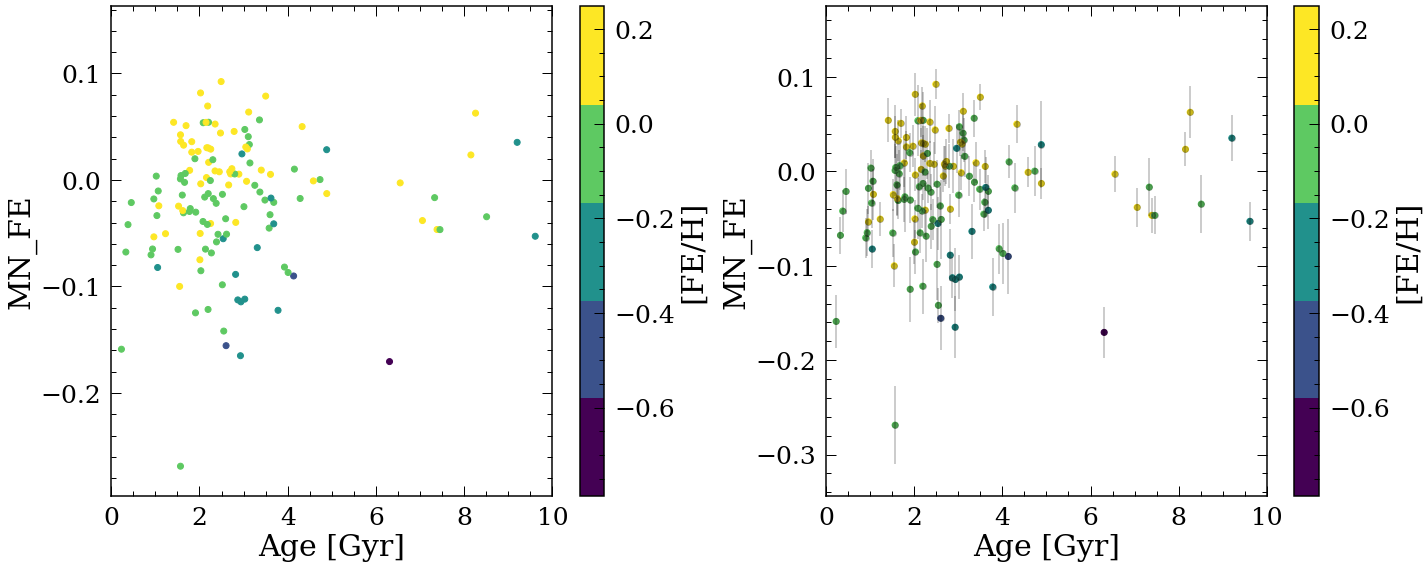

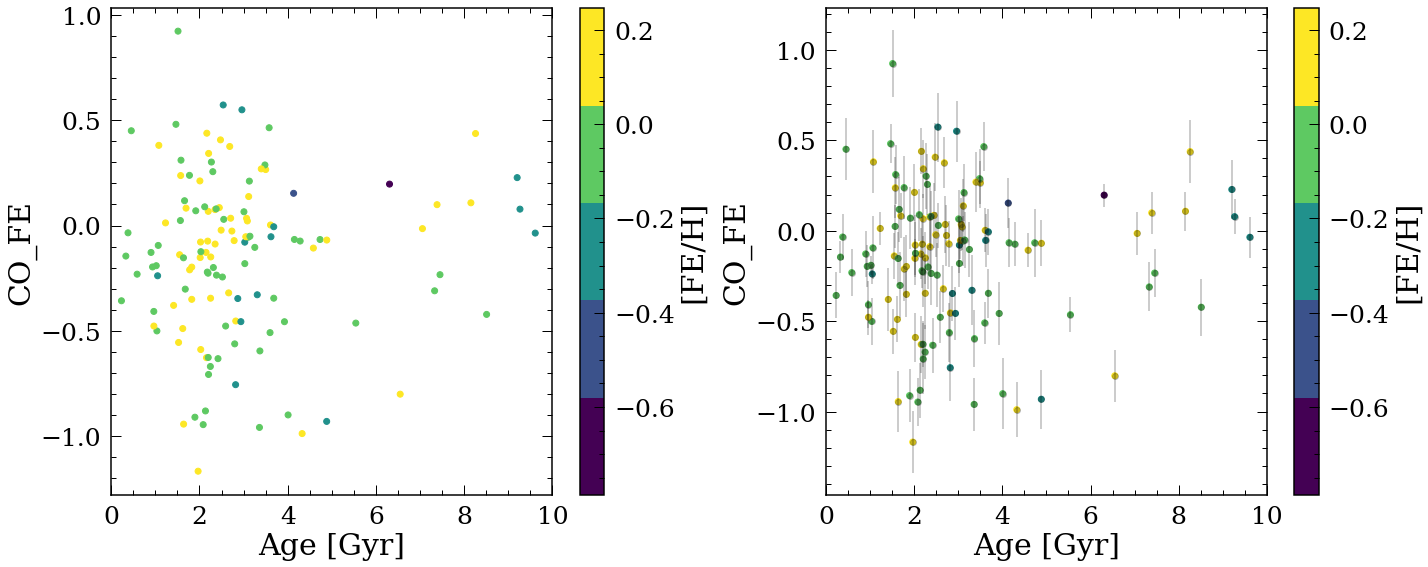

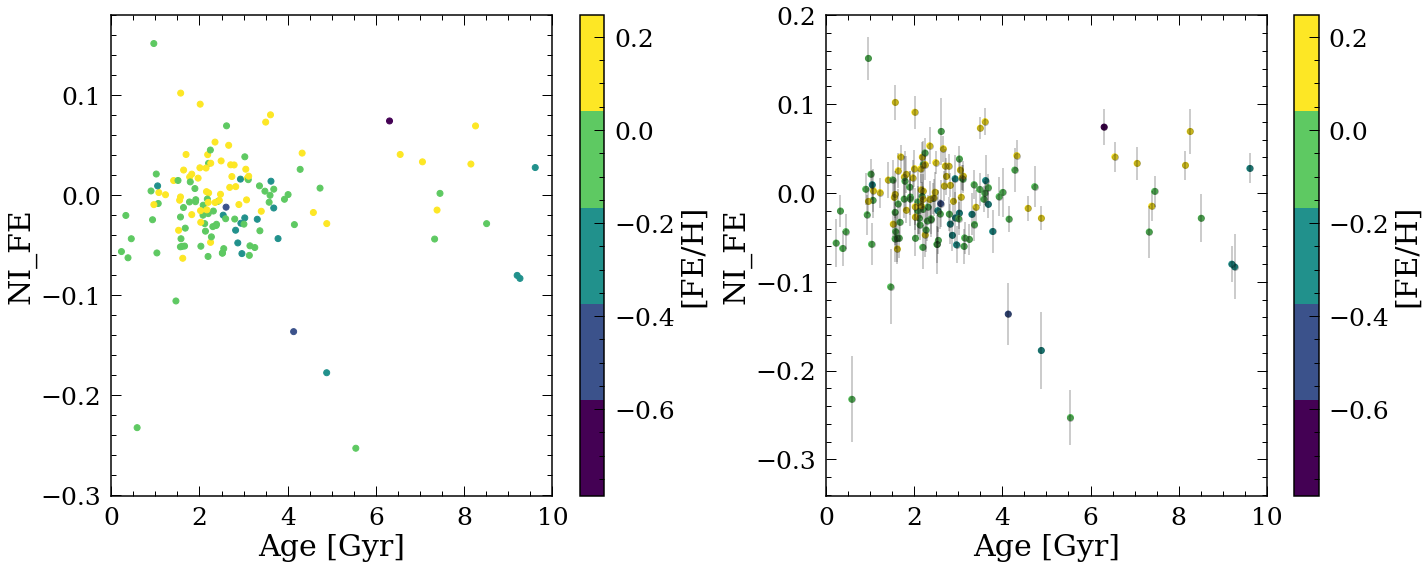

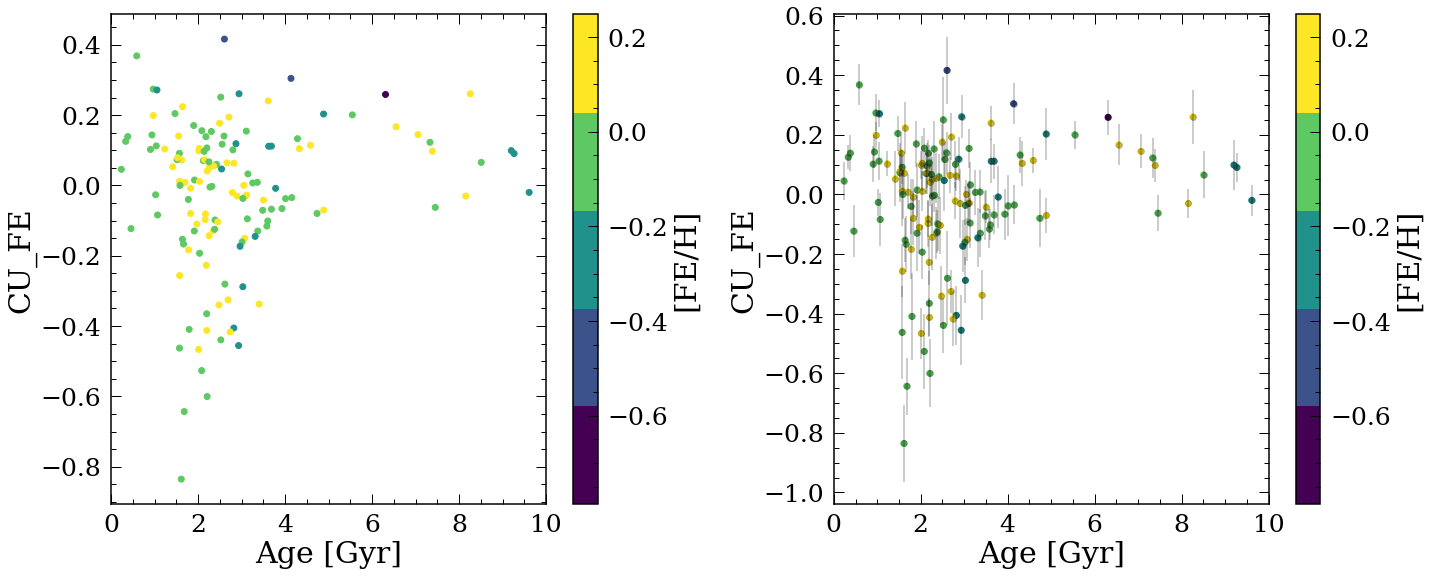

In [346]:
cm = plt.cm.get_cmap('viridis',5)
#df_plot=df_MS_AP.loc[df_MS_AP['teff']>4800]
#df_plot=df_plot.loc[df_plot['teff']<5200]
#df_plot=df_plot.loc[df_plot['logg']<3]
#df_plot=df_plot.loc[df_plot['logg']>2]
#print(len(df_plot))
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_MS_AP.loc[df_MS_AP[checkabd]>-100]
    #df_plot=df_plot.loc[df_plot[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['age_new'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['age_new'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['age_new'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        #plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])

In [344]:
df_MS_AP['logg']

0      3.949
1      4.737
2      4.731
3      4.429
4      3.894
       ...  
154    4.631
155    4.339
156    3.966
157    4.236
158    4.129
Name: logg, Length: 159, dtype: float64